<a href="https://colab.research.google.com/github/gaurav3g/tf_models/blob/main/StockPredict2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving INFY_data.csv to INFY_data.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use(style='seaborn')
%matplotlib inline

In [ ]:
new_column_names = ['series', 'open', 'high', 'low', 'prev close', 'ltp', 'close', 'vwap', '52w h', '52w l', 'vol', 'value','no of trades'];
convert_dict = {
    'series': str,
    'open': float,
    'high': float,
    'low': float,
    'prev close': float,
    'ltp': float,
    'close': float,
    'vwap': float,
    '52w h': float,
    '52w l': float,
    'vol': int,
    'value': float,
    'no of trades': int,
}
  
bse = pd.read_csv('INFY_data.csv', index_col='Date ', usecols=['Date ', 'HIGH ', 'VOLUME '])
bse.info()
bse.columns = ['close', 'vol']
bse[['close', 'vol']] = bse[['close', 'vol']].replace(',','', regex=True)
bse = bse.astype({
    'close': float,
    'vol': int,
})
bse.index = pd.to_datetime(bse.index)
bse = bse.sort_index()

<class 'pandas.core.frame.DataFrame'>
Index: 5982 entries, 07-May-2021 to 09-May-1997
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   HIGH     5982 non-null   object
 1   VOLUME   5982 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 140.2+ KB


In [ ]:
# bse = bse[['close'],]
bse.describe()

,close,vol
count,5982.000000,5.982000e+03
mean,2693.881879,2.340822e+06
std,1913.872404,4.039966e+06
min,558.000000,6.000000e+02
25%,1308.625000,5.761642e+05
50%,2330.450000,1.058302e+06
75%,3235.000000,2.422535e+06
max,16875.250000,9.043339e+07


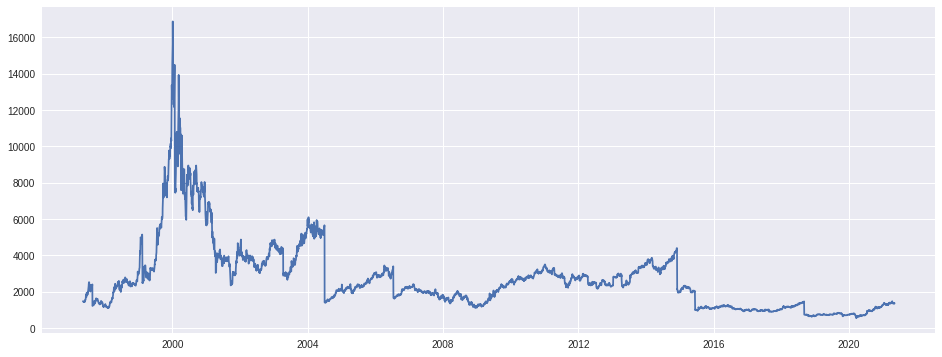

In [ ]:
plt.figure(1, figsize=(16, 6))
_ = plt.plot(bse.close)

In [ ]:
bse['returns'] = bse.close.pct_change()
bse['log_returns'] = np.log( 1 + bse.returns)
bse['is_expiry'] = (bse.index.dayofweek >= 3).astype(int)
bse.head(10)

,close,vol,returns,log_returns,is_expiry
Date,,,,,
1997-05-09,1479.00,14500,NaN,NaN,1
1997-05-12,1465.00,11200,-0.009466,-0.009511,0
1997-05-13,1455.60,5300,-0.006416,-0.006437,0
1997-05-14,1452.00,7700,-0.002473,-0.002476,0
1997-05-15,1450.50,3600,-0.001033,-0.001034,1
1997-05-16,1442.00,5400,-0.005860,-0.005877,1
1997-05-19,1461.75,6500,0.013696,0.013603,0
1997-05-20,1450.00,4200,-0.008038,-0.008071,0
1997-05-21,1450.00,5100,0.000000,0.000000,0


In [ ]:
bse.dropna(inplace=True)
X = bse[['close', 'vol', 'log_returns', 'is_expiry']].values
X

array([[ 1.46500000e+03,  1.12000000e+04, -9.51094126e-03,
         0.00000000e+00],
       [ 1.45560000e+03,  5.30000000e+03, -6.43705571e-03,
         0.00000000e+00],
       [ 1.45200000e+03,  7.70000000e+03, -2.47627035e-03,
         0.00000000e+00],
       ...,
       [ 1.34390000e+03,  3.93978800e+06, -8.18871871e-03,
         0.00000000e+00],
       [ 1.36470000e+03,  4.81009000e+06,  1.53587897e-02,
         1.00000000e+00],
       [ 1.37305000e+03,  4.99143500e+06,  6.09991847e-03,
         1.00000000e+00]])

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scalar = MinMaxScaler(feature_range=(0, 1)).fit(X)
x_scaled = scalar.transform(X)
# print(x_scaled[:5])
y = [np.take(x, [0, 3]) for x in x_scaled]
y[:5]

[array([0.05558535, 0.        ]),
 array([0.05500927, 0.        ]),
 array([0.05478864, 0.        ]),
 array([0.05469672, 1.        ]),
 array([0.0541758, 1.       ])]

Train test split

In [ ]:
n=2
split = int(np.ceil(len(x_scaled) * 0.85))

x_train = x_scaled[:split]
x_test = x_scaled[split-n:]
y_train = y[:split]
y_test = y[split-n:]


In [ ]:
assert len(x_train) == len(y_train)
assert len(x_test) == len(y_test)

Labelling

In [ ]:
Xtrain = [] 
Ytrain = [] 
Xtest = [] 
Ytest = []

for i in range(n, len(x_train)):
  s = [y_train[i][1], 0, 0, 0]
  Xtrain.append(np.append(x_train[i-n : i, : x_train.shape[1]], [s], axis=0))
  Ytrain.append(y_train[i][0]) # predict next record
print(Xtrain[0])
for i in range(n, len(x_test)):
  s = [y_test[i][1], 0, 0, 0]
  Xtest.append(np.append(x_test[i-n : i, : x_test.shape[1]], [s], axis=0))
  Ytest.append(y_test[i][0]) # predict next record

[[5.55853468e-02 1.17214117e-04 8.82263882e-01 0.00000000e+00]
 [5.50092693e-02 5.19722973e-05 8.84244589e-01 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]]


In [ ]:
bse.head()

,close,vol,returns,log_returns,is_expiry
Date,,,,,
1997-05-12,1465.0,11200,-0.009466,-0.009511,0
1997-05-13,1455.6,5300,-0.006416,-0.006437,0
1997-05-14,1452.0,7700,-0.002473,-0.002476,0
1997-05-15,1450.5,3600,-0.001033,-0.001034,1
1997-05-16,1442.0,5400,-0.005860,-0.005877,1


In [ ]:
print(Xtrain[0])
print(Ytrain[0])

[[5.55853468e-02 1.17214117e-04 8.82263882e-01 0.00000000e+00]
 [5.50092693e-02 5.19722973e-05 8.84244589e-01 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]]
0.05478864391977815


In [ ]:
val = np.array(Ytrain[0])
val = np.c_[val, np.zeros(val.shape), np.zeros(val.shape), np.zeros(val.shape)]
scalar.inverse_transform(val)

(1, 4)


array([[ 1.45200000e+03,  6.00000000e+02, -1.37870756e+00,
         0.00000000e+00]])

In [ ]:
Xtrain, Ytrain = (np.array(Xtrain), np.array(Ytrain))
print(Xtrain.shape)
Xtrain = np.reshape(Xtrain, (Xtrain.shape[0], Xtrain.shape[1], Xtrain.shape[2]))

Xtest, Ytest = (np.array(Xtest), np.array(Ytest))
Xtest = np.reshape(Xtest, (Xtest.shape[0], Xtest.shape[1], Xtest.shape[2]))
# Xtrain[0]

(5082, 3, 4)


LSTM MODEL

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

In [ ]:
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (Xtrain.shape[1], Xtrain.shape[2])))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(
    loss='mean_squared_error',
    optimizer='adam',
    metrics=['accuracy']
)

model.fit(
    Xtrain, Ytrain, epochs=100, batch_size=16, verbose=2
)

Epoch 1/100
318/318 - 5s - loss: 0.0024 - accuracy: 1.9677e-04
Epoch 2/100
318/318 - 2s - loss: 3.4747e-04 - accuracy: 1.9677e-04
Epoch 3/100
318/318 - 2s - loss: 2.7745e-04 - accuracy: 1.9677e-04
Epoch 4/100
318/318 - 2s - loss: 2.9110e-04 - accuracy: 1.9677e-04
Epoch 5/100
318/318 - 2s - loss: 3.3220e-04 - accuracy: 1.9677e-04
Epoch 6/100
318/318 - 2s - loss: 3.4477e-04 - accuracy: 1.9677e-04
Epoch 7/100
318/318 - 2s - loss: 2.3497e-04 - accuracy: 1.9677e-04
Epoch 8/100
318/318 - 2s - loss: 3.1189e-04 - accuracy: 1.9677e-04
Epoch 9/100
318/318 - 2s - loss: 2.4587e-04 - accuracy: 1.9677e-04
Epoch 10/100
318/318 - 2s - loss: 2.8638e-04 - accuracy: 1.9677e-04
Epoch 11/100
318/318 - 2s - loss: 2.5507e-04 - accuracy: 1.9677e-04
Epoch 12/100
318/318 - 2s - loss: 2.2624e-04 - accuracy: 1.9677e-04
Epoch 13/100
318/318 - 2s - loss: 2.3288e-04 - accuracy: 1.9677e-04
Epoch 14/100
318/318 - 2s - loss: 1.9820e-04 - accuracy: 1.9677e-04
Epoch 15/100
318/318 - 2s - loss: 1.8017e-04 - accuracy: 1.96

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 3, 128)            68096     
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense (Dense)                (None, 25)                1625      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 26        
Total params: 119,155
Trainable params: 119,155
Non-trainable params: 0
_________________________________________________________________


In [ ]:
trainPred = model.predict(Xtrain)
testPred = model.predict(Xtest)

In [ ]:
trainPred = np.c_[trainPred, np.zeros(trainPred.shape), np.zeros(trainPred.shape), np.zeros(trainPred.shape)]
testPred = np.c_[testPred, np.zeros(testPred.shape), np.zeros(testPred.shape), np.zeros(testPred.shape)]
print(trainPred.shape)

(5082, 4)


In [ ]:
trainPred = scalar.inverse_transform(trainPred)
trainPred = [x[0] for x in trainPred]

testPred = scalar.inverse_transform(testPred)
testPred = [x[0] for x in testPred]

# print(trainPred)
# print(testPred)

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
trainScore = mean_squared_error([x[0][0] for x in Xtrain], trainPred, squared=False)
print("Train Score: %.2f RMSE" % (trainScore))

testScore = mean_squared_error([x[0][0] for x in Xtest], testPred, squared=False)
print("Train Score: %.2f RMSE" % (testScore))

Train Score: 3657.66 RMSE
Train Score: 858.49 RMSE


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


              close  predictions
Date                            
2021-03-31  1388.00  1264.956215
2021-04-01  1391.60  1255.696001
2021-04-05  1425.00  1274.507111
2021-04-06  1426.00  1291.348313
2021-04-07  1434.95  1308.015604
2021-04-08  1451.70  1319.901734
2021-04-09  1455.00  1343.186730
2021-04-12  1477.55  1338.047232
2021-04-13  1435.25  1274.593610
2021-04-15  1366.40  1263.062898
2021-04-16  1370.85  1126.780553
2021-04-19  1379.70  1131.541838
2021-04-20  1379.00  1210.729679
2021-04-22  1364.80  1244.760876
2021-04-23  1348.40  1241.922511
2021-04-26  1351.30  1212.594122
2021-04-27  1353.00  1221.962050
2021-04-28  1359.50  1248.266068
2021-04-29  1369.00  1250.598020
2021-04-30  1373.90  1263.440930
2021-05-03  1361.00  1241.025059
2021-05-04  1354.95  1243.264677
2021-05-05  1343.90  1242.553293
2021-05-06  1364.70  1238.012359
2021-05-07  1373.05  1265.126661


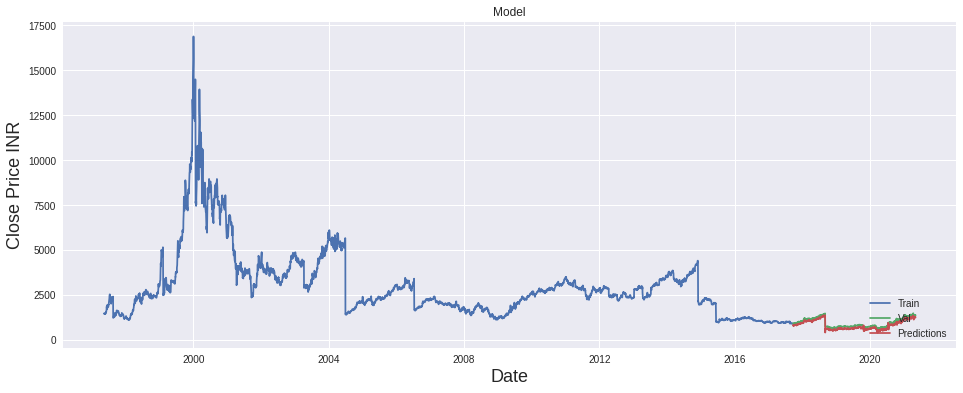

In [ ]:
# Plot the data
data = bse.filter(['close'])
train = data[:split]
valid = data[split:]
valid['predictions'] = testPred
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price INR', fontsize=18)
plt.plot(train['close'])
plt.plot(valid[['close', 'predictions']])
print(valid.tail(25))
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()